# Exemplos com Geopandas

### Made by Manuel Robalinho
### Set/2018

In [1]:
# https://pypi.org/project/geopy/
# https://geoffboeing.com/2014/09/using-geopandas-windows/
# https://github.com/gboeing/2014-summer-travels/blob/master/trip-visualization.ipynb
# https://geoffboeing.com/2014/07/visualizing-summer-travels-part-1-openpaths/
# https://www.fintu.ai/en/working-with-geodata-in-python/
# https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html#sphx-glr-gallery-create-geopandas-from-pandas-py
# http://geopandas.org/aggregation_with_dissolve.html
# http://www.net-analysis.com/blog/maprotation.html
# http://darribas.org/gds15/content/labs/lab_03.html

In [17]:
# command to display matplotlib plots inline within the ipython notebook  
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
from datetime import datetime as dt
from time import time
from shapely.geometry import Polygon
from geopy.distance import great_circle
from geopandas import GeoDataFrame as gdp

In [2]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics

df = pd.read_csv('ml/summer/data/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('ml/summer/data/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [3]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [4]:
rs.head()

,Unnamed: 0,lat,lon,date,city,country
0,0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,1,38.774422,-9.129195,05/14/2014 15:25,Lisbon,Portugal
2,2,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
3,3,38.712325,-9.137434,05/17/2014 08:09,Lisbon,Portugal
4,4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


In [5]:
title_font = fm.FontProperties(family='Arial', style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Arial', style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Arial', style='normal', size=12, weight='normal', stretch='normal')
annotation_font = fm.FontProperties(family='Arial', style='normal', size=11, weight='normal', stretch='normal')

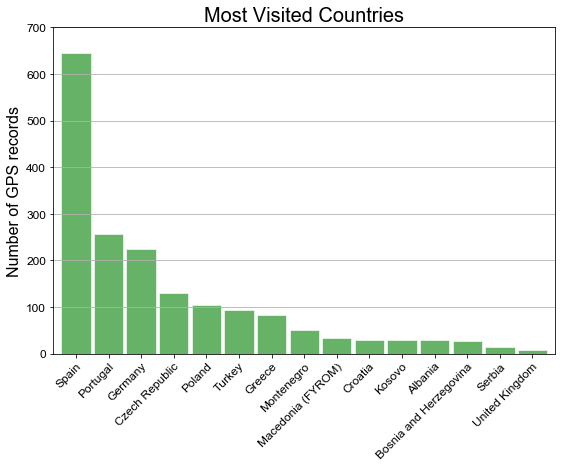

In [6]:
# plot a histogram of the countries I visited
countdata = df['country'].value_counts()
ax = countdata.plot(kind='bar',                 
                    figsize=[9, 6], 
                    width=0.9, 
                    alpha=0.6, 
                    color='g',
                    edgecolor='w',
                    grid=False,
                    ylim=[0, 700])

ax.set_xticks(range(len(countdata)))
ax.set_xticklabels(countdata.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Most Visited Countries', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

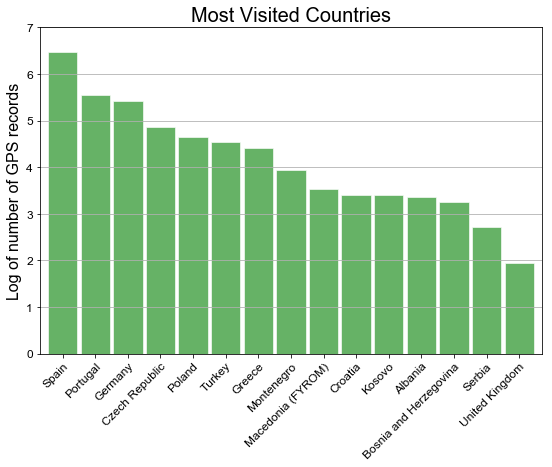

In [7]:
# let's re-scale that to make it look better
countdata = np.log(df['country'].value_counts())
ax = countdata.plot(kind='bar',                 
                    figsize=[9, 6], 
                    width=0.9, 
                    alpha=0.6, 
                    color='g',
                    edgecolor='w',
                    grid=False,
                    ylim=[0, 7])

ax.set_xticks(range(len(countdata)))
ax.set_xticklabels(countdata.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_title('Most Visited Countries', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Log of number of GPS records', fontproperties=label_font)

plt.show()

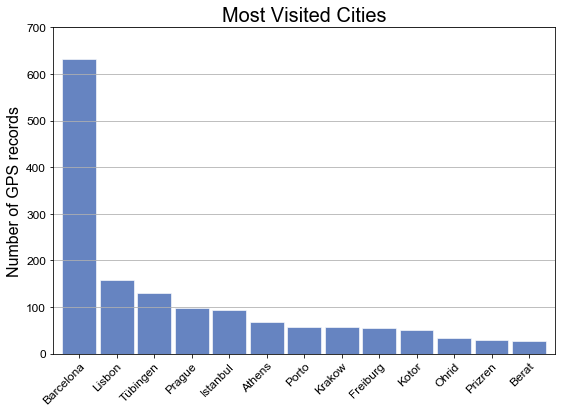

In [8]:
# plot a histogram of the cities I visited most
countdata = df['city'].value_counts().head(13)
xlabels = pd.Series(countdata.index)

ax = countdata.plot(kind='bar',                 
                    figsize=[9, 6], 
                    width=0.9, 
                    alpha=0.6, 
                    color='#003399',
                    edgecolor='w',
                    grid=False,
                    ylim=[0, 700])

ax.set_xticks(range(len(countdata)))
ax.set_xticklabels(countdata.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
ax.set_title('Most Visited Cities', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

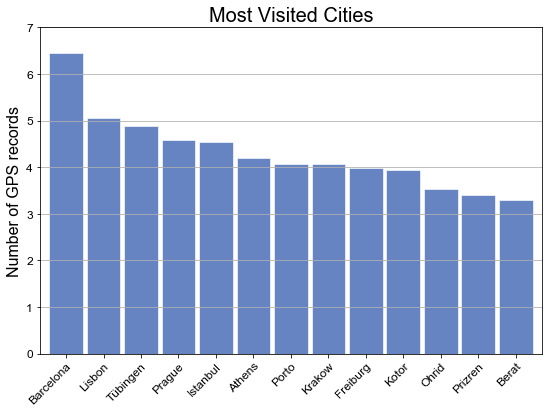

In [9]:
# let's re-scale that to make it look better
countdata = np.log(df['city'].value_counts().head(13))
ax = countdata.plot(kind='bar',                 
                    figsize=[9, 6], 
                    width=0.9, 
                    alpha=0.6, 
                    color='#003399',
                    edgecolor='w',
                    grid=False,
                    ylim=[0, 7])

ax.set_xticks(range(len(countdata)))
ax.set_xticklabels(countdata.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
ax.yaxis.grid(True)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
ax.set_title('Most Visited Cities', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of GPS records', fontproperties=label_font)

plt.show()

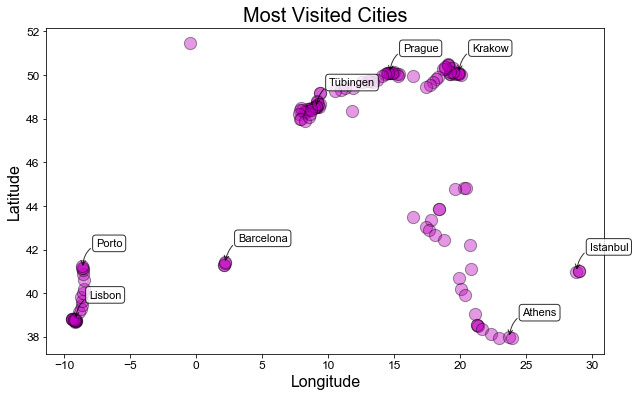

In [10]:
# get a representative point from the reduced data set for each of the most visited cities in the full set
most_index = df['city'].value_counts().head(8).index
most = pd.DataFrame(df[df['city'].isin(most_index)])
most.drop_duplicates(subset=['city'], keep='first', inplace=True)

# plot the final reduced set of coordinate points vs the original full set
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='m', edgecolor='k', alpha=.4, s=150)

# set axis labels, tick labels, and title
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Most Visited Cities', fontproperties=title_font)
ax.set_xlabel('Longitude', fontproperties=label_font)
ax.set_ylabel('Latitude', fontproperties=label_font)

# annotate the most visited cities
for _, row in most.iterrows():
    ax.annotate(row['city'], 
                xy=(row['lon'], row['lat']),
                xytext=(row['lon'] + 1, row['lat'] + 1),
                fontproperties=annotation_font,
                bbox=dict(boxstyle='round', color='k', fc='w', alpha=0.8),
                xycoords='data',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', color='k', alpha=0.8))
plt.show()

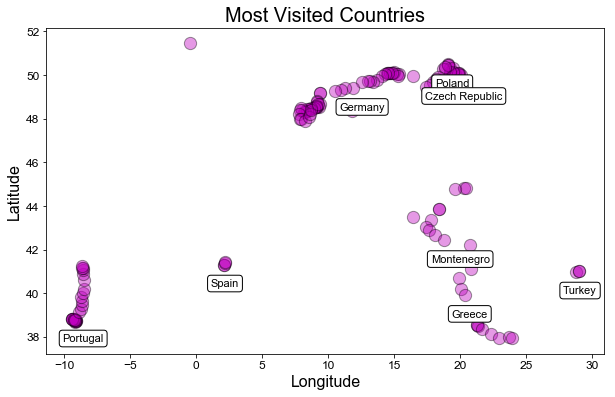

In [13]:
# get a representative point from the reduced data set for each of the most visited countries in the full set
most_index = df['country'].value_counts().head(8).index
most = pd.DataFrame(df[df['country'].isin(most_index)])
most.drop_duplicates(subset=['country'], keep='first', inplace=True)

# plot the final reduced set of coordinate points vs the original full set
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='m', edgecolor='k', alpha=.4, s=150)

# set axis labels, tick labels, and title
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
ax.set_title('Most Visited Countries', fontproperties=title_font)
ax.set_xlabel('Longitude', fontproperties=label_font)
ax.set_ylabel('Latitude', fontproperties=label_font)

# annotate the most visited countries
for _, row in most.iterrows():
    ax.annotate(row['country'], 
                xy=(row['lon'], row['lat']),
                xytext=(row['lon'] - 1, row['lat'] - 1),
                fontproperties=annotation_font,
                bbox=dict(boxstyle="round", fc="1"),
                xycoords='data')
plt.show()

In [19]:
#load the shapefile of all countries in the world
all_countries = gdp.from_file('ml/summer/shapefiles/countries_shp/world_country_admin_boundary_shapefile_with_fips_codes.shp')
all_countries.head(10)

,FIPS_CNTRY,CNTRY_NAME,geometry
0,AA,Aruba,POLYGON ((-69.88223266601563 12.41110992431641...
1,AC,Antigua & Barbuda,(POLYGON ((-61.7388916015625 17.54055404663086...
2,AE,United Arab Emirates,(POLYGON ((56.28047180175781 24.85727310180664...
3,AF,Afghanistan,"POLYGON ((61.27655792236328 35.60724639892578,..."
4,AG,Algeria,POLYGON ((-5.152134895324707 30.18046951293945...
5,AJ,Azerbaijan,"(POLYGON ((51.2927131652832 38.71485137939453,..."
6,AL,Albania,"POLYGON ((20.79192352294922 40.43154144287109,..."
7,AM,Armenia,(POLYGON ((46.54037475585938 38.87558746337891...
8,AN,Andorra,"POLYGON ((1.445833206176758 42.60194396972656,..."
9,AO,Angola,(POLYGON ((13.09138870239258 -4.63305568695068...


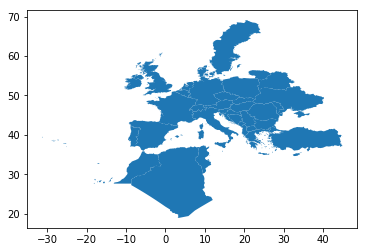

In [20]:
# define the coordinates at the extent of our point data for our map
margin_width = 4
lon_range = [rs['lon'].min() - margin_width, rs['lon'].max() + margin_width]
lat_range = [rs['lat'].min() - margin_width, rs['lat'].max() + margin_width]

# create a rectangle from these coordinates
spatial_extent = Polygon([(lon_range[0], lat_range[0]), 
                          (lon_range[0], lat_range[1]), 
                          (lon_range[1], lat_range[1]),
                          (lon_range[1], lat_range[0])])

# one way to get the shapes is with geopandas intersection, but that chops the shapes off at the extent
#countries = all_countries['geometry'].intersection(spatial_extent)

# another way to get the shapes is geopandas intersects, which pulls the full shape
# but let's remove russia because it's too big
countries = all_countries[all_countries['geometry'].intersects(spatial_extent)]
countries = countries[countries['CNTRY_NAME'] != 'Russia']

countries.plot()

# Geocoding

In [21]:
#Prerequisites
#The libraries required for this section can be installed with PyPI as follows (here for Python3):

# conda install -c conda-forge geopy
# conda install -c conda-forge ratelimit
# conda install -c conda-forge tqdm # for progress bars
# conda install -c conda-forge ipyleaflet

In [22]:
# get a representative point for each of the most visited cities
most_index = df['city'].value_counts().head(6).index
most = pd.DataFrame(rs[rs['city'].isin(most_index)])
most.drop_duplicates(subset=['city'], keep='first', inplace=True)

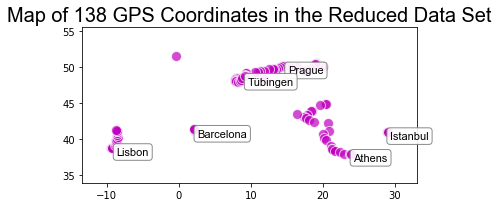

In [23]:
# draw a map of our point data on top of a basemap of country boundaries
fig = plt.figure()

# set the figure dimensions to the extent of the coordinates in our data
ydimension = int((lat_range[1] - lat_range[0]) / 4)
xdimension = int((lon_range[1] - lon_range[0]) / 4)
fig.set_size_inches(xdimension, ydimension)

# plot the country boundaries and then our point data
countries.plot(alpha=0)
rs_scatter = plt.scatter(x=rs['lon'], y=rs['lat'], c='m', edgecolor='w', alpha=0.7, s=100)

# annotate the most visited cities in the data set
for _, row in most.iterrows():
    plt.annotate(row['city'], 
                 xy=(row['lon'], row['lat']),
                 xytext=(row['lon'] + 0.5, row['lat'] - 1),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='gray', fc='w', alpha=0.9),
                 xycoords='data')

# limit the coordinate space shown to the extent of our point data
plt.xlim(lon_range)
plt.ylim(lat_range)   

# set axis labels and title
plt.title('Map of {} GPS Coordinates in the Reduced Data Set'.format(len(rs)), fontproperties=title_font)

plt.show()

# Now draw some pie charts to show proportions

In [24]:
# function to produce more beautiful pie charts with matplotlib
def gbplot_pie(fractions, #values for the wedges
              labels, #labels for the wedges
              title = '', #title of the pie chart
              cm_name = 'Pastel1', #name of the matplotlib colormap to use
              autopct = '%1.1f%%', #format the value text on each pie wedge
              labeldistance = 1.05, #where to place wedge labels in relation to pie wedges
              shadow = True, #shadow around the pie
              startangle = 90, #rotate 90 degrees to start the top of the data set on the top of the pie
              edgecolor = 'w', #color of pie wedge edges
              width = 8, #width of the figure in inches
              height = 8, #height of the figure in inches
              grouping_threshold = None, #group all wedges below this value into one 'all others' wedge
              grouping_label = None): #what the label the grouped wedge
    
    # if the user passed a threshold value, group all fractions lower than it into one 'misc' pie wedge
    if not grouping_threshold==None:
        
        # if user didn't pass a label, apply a default text
        if grouping_label == None:
            grouping_label = 'Others'

        # select the rows greater than the cutoff value
        row_mask = fractions > grouping_threshold
        meets_threshold = fractions[row_mask]

        # group all other rows below the cutoff value
        all_others = pd.Series(fractions[~row_mask].sum())
        all_others.index = [grouping_label]

        # append the grouped row to the bottom of the rows to display
        fractions = meets_threshold.append(all_others)
        labels = fractions.index
    
    # get the color map then pull 1 color from it for each pie wedge we'll draw
    color_map = cm.get_cmap(cm_name)
    num_of_colors = len(fractions)
    colors = color_map([x/float(num_of_colors) for x in range(num_of_colors)])
    
    # create the figure and an axis to plot on
    fig, ax = plt.subplots(figsize=[width, height])
    
    # plot the pie
    wedges = ax.pie(fractions, 
                    labels = labels, 
                    labeldistance = labeldistance,
                    autopct = autopct,
                    colors = colors,
                    shadow = shadow, 
                    startangle = startangle)
    
    # change the edgecolor for each wedge
    for wedge in wedges[0]:
        wedge.set_edgecolor(edgecolor)
    
    # set the title and show the plot
    ax.set_title(title, fontproperties=title_font)
    plt.show()

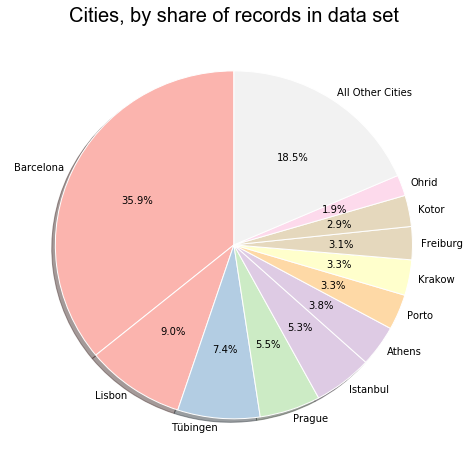

In [25]:
countdata = df['city'].value_counts()
gbplot_pie(fractions = countdata,
           labels = countdata.index,
           title = 'Cities, by share of records in data set',
           grouping_threshold = 30,
           grouping_label = 'All Other Cities')

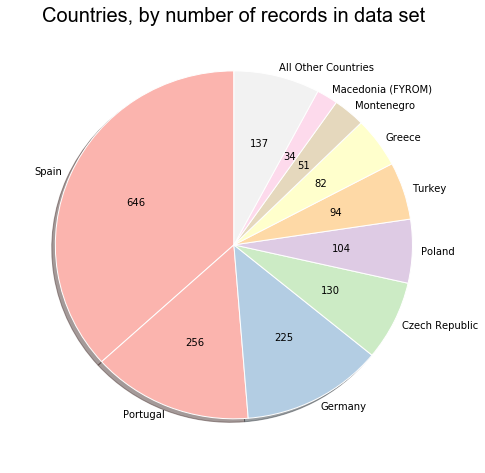

In [26]:
countdata = df['country'].value_counts()

# convert the pie wedge percentage into its absolute value
def my_autopct(pct):
    total = sum(countdata)
    val = int(round(pct*total)/100.0000)
    return '{v:d}'.format(v=val)

gbplot_pie(fractions = countdata,
           labels = countdata.index,
           title = 'Countries, by number of records in data set',
           autopct=my_autopct,
           grouping_threshold = 30,
           grouping_label = 'All Other Countries')

# Geocoding -To geolocate a query to an address and coordinates:

In [27]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.geocode("175 5th Avenue NYC")
print(location.address)

Flatiron Building, 175, 5th Avenue, Flatiron District, Manhattan, Manhattan Community Board 5, New York County, NYC, New York, 10010, USA


In [28]:
#Flatiron Building, 175, 5th Avenue, Flatiron, New York, NYC, New York, ...
print((location.latitude, location.longitude))
print(location.raw)

(40.7410861, -73.9896298241625)
{'place_id': '138642704', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': '264768896', 'boundingbox': ['40.7407597', '40.7413004', '-73.9898715', '-73.9895014'], 'lat': '40.7410861', 'lon': '-73.9896298241625', 'display_name': 'Flatiron Building, 175, 5th Avenue, Flatiron District, Manhattan, Manhattan Community Board 5, New York County, NYC, New York, 10010, USA', 'class': 'tourism', 'type': 'attraction', 'importance': 0.793003315521974, 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/poi_point_of_interest.p.20.png'}


In [29]:
# To find the address corresponding to a set of coordinates:

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.reverse("52.509669, 13.376294")
print(location.address)

Potsdamer Platz, Tiergarten, Mitte, Berlin, 10785, Deutschland


In [30]:
#Potsdamer Platz, Mitte, Berlin, 10117, Deutschland, European Union
print((location.latitude, location.longitude))
print(location.raw)

(52.5098014, 13.3755897912911)
{'place_id': '198746248', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': '3200536', 'lat': '52.5098014', 'lon': '13.3755897912911', 'display_name': 'Potsdamer Platz, Tiergarten, Mitte, Berlin, 10785, Deutschland', 'address': {'attraction': 'Potsdamer Platz', 'footway': 'Potsdamer Platz', 'suburb': 'Tiergarten', 'city_district': 'Mitte', 'state': 'Berlin', 'postcode': '10785', 'country': 'Deutschland', 'country_code': 'de'}, 'boundingbox': ['52.5082999', '52.5100374', '13.3750548', '13.3769528']}


In [31]:
# Measuring Distance

from geopy.distance import geodesic
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(geodesic(newport_ri, cleveland_oh).miles)

538.3904453677205


In [32]:
# Using great-circle distance:

from geopy.distance import great_circle
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(great_circle(newport_ri, cleveland_oh).miles)

536.9979906964345


# Geocoding with GeoPy and Nominatim

In [33]:
from geopy.geocoders import Nominatim
gc = Nominatim(user_agent="fintu-blog-geocoding-python")
x = gc.geocode("Berlin Deutschland")
# Location(Kommandantenhaus, 1, Unter den Linden, Spandauer Vorstadt, Mitte, Berlin, 10117, Deutschland, (52.51720765, 13.3978343993255, 0.0)
x

Location(Berlin, 10117, Deutschland, (52.5170365, 13.3888599, 0.0))

In [34]:
geolocator = Nominatim(user_agent="fintu-blog-geocoding-python")
location = geolocator.geocode("Julio Cesar Fortaleza Brazil")
print(location.address)

Rua Julio César, Montese, Fortaleza, Microrregião de Fortaleza, Mesorregião Metropolitana de Fortaleza, CE, Região Nordeste, 60425351, Brasil


In [35]:
print((location.latitude, location.longitude))
print(location.raw)

(-3.7602552, -38.5513155)
{'place_id': '174400257', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': '452258907', 'boundingbox': ['-3.7608307', '-3.7602552', '-38.5517902', '-38.5513155'], 'lat': '-3.7602552', 'lon': '-38.5513155', 'display_name': 'Rua Julio César, Montese, Fortaleza, Microrregião de Fortaleza, Mesorregião Metropolitana de Fortaleza, CE, Região Nordeste, 60425351, Brasil', 'class': 'highway', 'type': 'residential', 'importance': 0.31000000000000005}


# Creating a GeoDataFrame from a DataFrame with coordinates

In [36]:
import pandas as pd
import geopandas 
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [37]:
# Creating a dataframe
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [38]:
df

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [39]:
# A GeoDataFrame needs a shapely object, so we create a new column Coordinates as a tuple of Longitude and Latitude :
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))

In [40]:
df

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,"(-58.66, -34.58)"
1,Brasilia,Brazil,-15.78,-47.91,"(-47.91, -15.78)"
2,Santiago,Chile,-33.45,-70.66,"(-70.66, -33.45)"
3,Bogota,Colombia,4.60,-74.08,"(-74.08, 4.6)"
4,Caracas,Venezuela,10.48,-66.86,"(-66.86, 10.48)"


In [41]:
# transform tuples to Point :
df['Coordinates'] = df['Coordinates'].apply(Point)
df

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


In [42]:
# create the GeoDataFrame by setting geometry with the coordinates created previously.
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')
gdf

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


In [43]:
gdf.type

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

In [44]:
print(gdf.head())

           City    Country  Latitude  Longitude            Coordinates
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66 -34.58)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91 -15.78)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66 -33.45)
3        Bogota   Colombia      4.60     -74.08     POINT (-74.08 4.6)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86 10.48)


# Plot only continent South America

[]

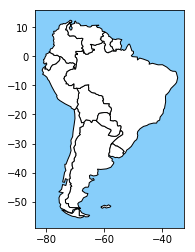

In [45]:
# plot the coordinates over a country-level map.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# We restrict to South America.
gdf = world[world.continent == 'South America'].plot(color='white', edgecolor='black')

water = 'lightskyblue'
earth = 'tan'
gdf.set_facecolor(water)

# We can now plot our GeoDataFrame.
gdf.plot( color='red', facecolor=earth, linewidth=1, alpha=1)


# Aggregation with dissolve Geopandas

In [46]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [47]:
# Information by city
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
world.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


In [48]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 2 columns):
name        202 non-null object
geometry    202 non-null object
dtypes: object(2)
memory usage: 3.2+ KB


In [49]:
# Information by country and continent
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.sort_values("continent", inplace=True)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
176,12619600.0,Africa,Zimbabwe,ZWE,9323.0,"POLYGON ((31.19140913262129 -22.2515096981724,..."
31,20617068.0,Africa,Côte d'Ivoire,CIV,33850.0,POLYGON ((-2.856125047202397 4.994475816259509...
32,18879301.0,Africa,Cameroon,CMR,42750.0,"POLYGON ((13.07582238124675 2.267097072759015,..."
33,68692542.0,Africa,Dem. Rep. Congo,COD,20640.0,"POLYGON ((30.83385989759381 3.509165961110341,..."
34,4012809.0,Africa,Congo,COG,15350.0,POLYGON ((12.99551720546518 -4.781103203961884...


In [50]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 177 entries, 176 to 46
Data columns (total 6 columns):
pop_est       177 non-null float64
continent     177 non-null object
name          177 non-null object
iso_a3        177 non-null object
gdp_md_est    177 non-null float64
geometry      177 non-null object
dtypes: float64(2), object(4)
memory usage: 9.7+ KB


In [51]:
# Information by continent
world = geopandas.read_file(geopandas.datasets.get_path('nybb'))
world.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,4,Queens,896344.047763,3.045213e+09,(POLYGON ((1029606.076599121 156073.8142089844...
2,3,Brooklyn,741080.523166,1.937479e+09,(POLYGON ((1021176.479003906 151374.7969970703...
3,1,Manhattan,359299.096471,6.364715e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464392.991824,1.186925e+09,(POLYGON ((1012821.805786133 229228.2645874023...


In [52]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
BoroCode      5 non-null int64
BoroName      5 non-null object
Shape_Leng    5 non-null float64
Shape_Area    5 non-null float64
geometry      5 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 280.0+ bytes


# Plot Continent

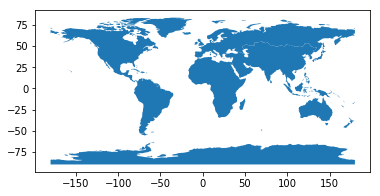

,geometry
continent,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...
Antarctica,(POLYGON ((-159.2081835601977 -79.497059421708...
Asia,(POLYGON ((120.7156087586305 -10.2395813940878...
Europe,(POLYGON ((-52.55642473001839 2.50470530843705...
North America,"(POLYGON ((-61.68000000000001 10.76, -61.105 1..."
Oceania,(POLYGON ((173.0203747907408 -40.9190524228564...
Seven seas (open ocean),"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
South America,(POLYGON ((-68.63401022758316 -52.636370458874...


In [53]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world = world[['continent', 'geometry']]
continents = world.dissolve(by='continent')
continents.plot();
plt.show()
continents.head(10)

# Plot Continent and point out South America

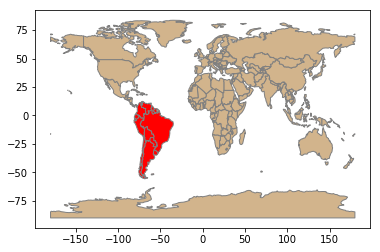

,geometry
continent,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...
Antarctica,(POLYGON ((-159.2081835601977 -79.497059421708...
Asia,(POLYGON ((120.7156087586305 -10.2395813940878...
Europe,(POLYGON ((-52.55642473001839 2.50470530843705...
North America,"(POLYGON ((-61.68000000000001 10.76, -61.105 1..."
Oceania,(POLYGON ((173.0203747907408 -40.9190524228564...
Seven seas (open ocean),"POLYGON ((68.935 -48.62500000000001, 69.58 -48..."
South America,(POLYGON ((-68.63401022758316 -52.636370458874...


In [54]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world = world[['continent', 'geometry']]
continents = world.dissolve(by='continent')
#continents.plot();

fig, ax = plt.subplots()
world[world['continent']!='South America'].\
            plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)

world[world['continent']=='South America'].\
           plot(ax=ax, edgecolor='grey', facecolor='red', linewidth=1, alpha=1)
plt.show()
continents.head(15)

In [55]:
continents.index == 'South America'

array([False, False, False, False, False, False, False,  True], dtype=bool)

# Plot world map by aggregate population

,geometry,pop_est
continent,,
Africa,(POLYGON ((49.54351891459575 -12.4698328589405...,9.932819e+08
Antarctica,(POLYGON ((-159.2081835601977 -79.497059421708...,3.802000e+03
Asia,(POLYGON ((120.7156087586305 -10.2395813940878...,4.085853e+09
Europe,(POLYGON ((-52.55642473001839 2.50470530843705...,7.281312e+08
North America,"(POLYGON ((-61.68000000000001 10.76, -61.105 1...",5.393510e+08


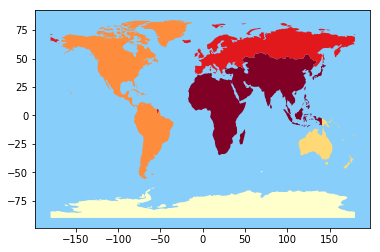

In [57]:
# If we are interested in aggregate populations, however, we can pass different functions to the dissolve method to aggregate populations:
fig, ax = plt.subplots()

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry', 'pop_est']]
continents = world.dissolve(by='continent', aggfunc='sum')

water = 'lightskyblue'
earth = 'tan'
ax.set_facecolor(water)
    
continents.plot(ax=ax, column = 'pop_est', scheme='quantiles', cmap='YlOrRd', facecolor=earth, linewidth=1, alpha=1);

continents.head()
    

# Paint a Country point out Brazil

In [58]:
import geopandas as gpd

In [59]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# create a GeoSeries from the GeoDataFrame
wgs = gpd.GeoSeries([g for  g in world['geometry']])

# rotate the world
wgs2 = wgs.rotate(360, origin = (0,0), use_radians=False)
wgs = wgs2
world['geometry'] = wgs2
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


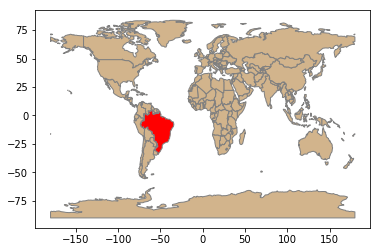

In [60]:
fig, ax = plt.subplots()
world[world['name']!='Brazil'].\
            plot(ax=ax, edgecolor='grey', facecolor=earth, linewidth=1, alpha=1)

world[world['name']=='Brazil'].\
           plot(ax=ax, edgecolor='grey', facecolor='red', linewidth=1, alpha=1)
plt.show()

In [61]:
import geopandas as gpd
cont = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cont.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [62]:
cont = cont[cont.continent == 'South America']
contx = cont[['name', 'geometry']]
conty = contx.dissolve(by='name')
cont.describe

<bound method NDFrame.describe of          pop_est      continent          name iso_a3  gdp_md_est  \
4     40913584.0  South America     Argentina    ARG    573900.0   
21     9775246.0  South America       Bolivia    BOL     43270.0   
22   198739269.0  South America        Brazil    BRA   1993000.0   
29    16601707.0  South America         Chile    CHL    244500.0   
35    45644023.0  South America      Colombia    COL    395400.0   
46    14573101.0  South America       Ecuador    ECU    107700.0   
54        3140.0  South America  Falkland Is.    FLK       105.1   
67      772298.0  South America        Guyana    GUY      2966.0   
124   29546963.0  South America          Peru    PER    247300.0   
131    6995655.0  South America      Paraguay    PRY     28890.0   
148     481267.0  South America      Suriname    SUR      4254.0   
167    3494382.0  South America       Uruguay    URY     43160.0   
170   26814843.0  South America     Venezuela    VEN    357400.0   

             

In [63]:
contx.head()

,name,geometry
4,Argentina,(POLYGON ((-65.50000000000003 -55.199999999999...
21,Bolivia,POLYGON ((-62.84646847192156 -22.0349854468694...
22,Brazil,POLYGON ((-57.62513342958296 -30.2162948544542...
29,Chile,(POLYGON ((-68.63401022758316 -52.636370458874...
35,Colombia,POLYGON ((-75.37322323271385 -0.15203175212045...


In [64]:
gdf = contx
col = gdf.columns.tolist()[0:4]
print (col)

['name', 'geometry']


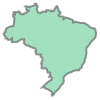

In [65]:
# Plot only row 22 - BRAZIL
gdf.loc[22, 'geometry']

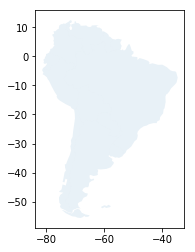

In [66]:
# Intensity off color map
gdf.plot(alpha=0.1)

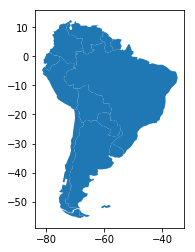

In [67]:
# Intensity off color map
gdf.plot(alpha=1)

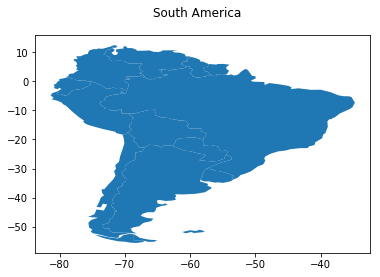

In [68]:
# Intensity off color map
fig, ax = plt.subplots(1)
gdf.plot(ax=ax)
fig.suptitle('South America')
plt.show()

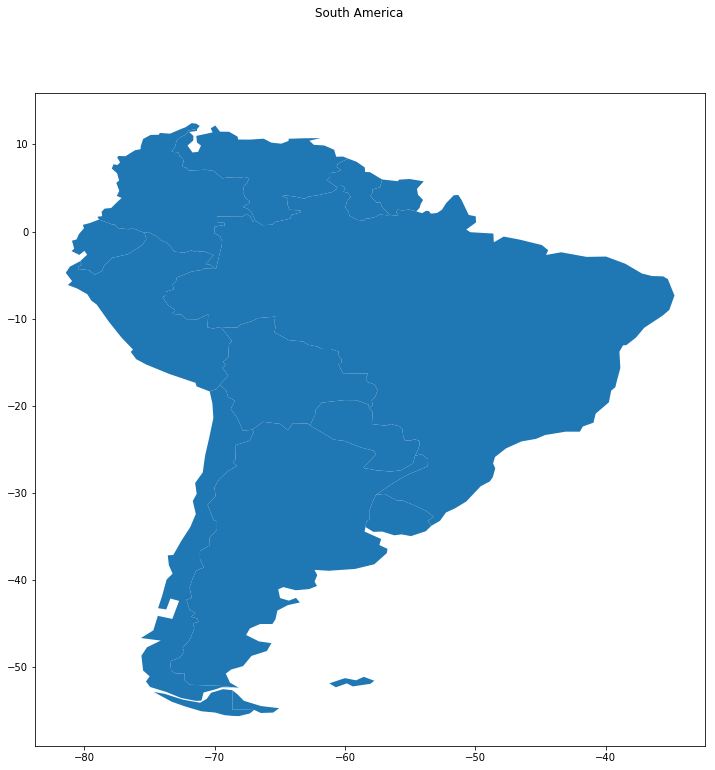

In [69]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = gdf.plot(ax=ax)
f.suptitle('South America')
plt.show()

{'init': 'epsg:4326'}


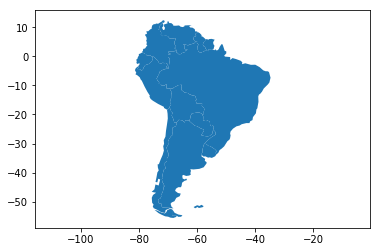

In [70]:
# transform the dataset into lat/lon coordinates, we would use its EPSG code, 4326:
print (gdf.crs)
gdf.to_crs(epsg=4326).plot()
lims = plt.axis('equal')

In [71]:
df.head()

,City,Country,Latitude,Longitude,Coordinates
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


In [72]:
cont.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
21,9775246.0,South America,Bolivia,BOL,43270.0,POLYGON ((-62.84646847192156 -22.0349854468694...
22,198739269.0,South America,Brazil,BRA,1993000.0,POLYGON ((-57.62513342958296 -30.2162948544542...
29,16601707.0,South America,Chile,CHL,244500.0,(POLYGON ((-68.63401022758316 -52.636370458874...
35,45644023.0,South America,Colombia,COL,395400.0,POLYGON ((-75.37322323271385 -0.15203175212045...


In [73]:
# The country with smallest population
smallest = cont.sort_values('pop_est').head(6)
smallest

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
54,3140.0,South America,Falkland Is.,FLK,105.1,"POLYGON ((-61.2 -51.85, -60 -51.25, -59.15 -51..."
148,481267.0,South America,Suriname,SUR,4254.0,POLYGON ((-57.14743648947689 5.973149929219161...
67,772298.0,South America,Guyana,GUY,2966.0,POLYGON ((-59.75828487815919 8.367034816924047...
167,3494382.0,South America,Uruguay,URY,43160.0,POLYGON ((-57.62513342958296 -30.2162948544542...
131,6995655.0,South America,Paraguay,PRY,28890.0,POLYGON ((-62.68505713565789 -22.2490292294223...
21,9775246.0,South America,Bolivia,BOL,43270.0,POLYGON ((-62.84646847192156 -22.0349854468694...


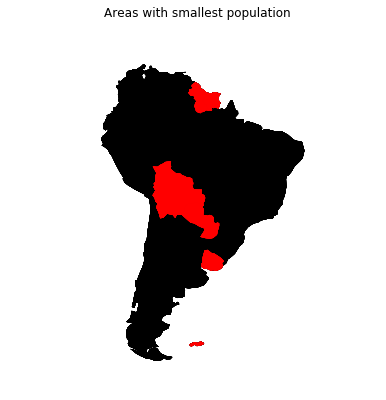

In [74]:
# PLOT - The country with smallest population
f, ax = plt.subplots(1, figsize=(6, 6))
# Base layer with all the areas for the background
for geometry in cont['geometry']:
    cont.plot(ax=ax, facecolor='black', linewidth=0.025)
    
# Smallest areas
for name in smallest['geometry']:
    smallest.plot(ax=ax, alpha=1, facecolor='red', linewidth=0)
    
ax.set_axis_off()
f.suptitle('Areas with smallest population')
plt.axis('equal')
plt.show()

In [75]:
# Exemple for test transform polygon to point
from shapely.geometry import Point, Polygon
import geopandas

polys = geopandas.GeoSeries({
    'foo': Polygon([(5, 5), (5, 13), (13, 13), (13, 5)]),
    'bar': Polygon([(10, 10), (10, 15), (15, 15), (15, 10)]),
})

polys

foo          POLYGON ((5 5, 5 13, 13 13, 13 5, 5 5))
bar    POLYGON ((10 10, 10 15, 15 15, 15 10, 10 10))
dtype: object

In [76]:
_pnts = [Point(3, 3), Point(8, 8), Point(11, 11)]
pnts = geopandas.GeoDataFrame(geometry=_pnts, index=['A', 'B', 'C'])
pnts = pnts.assign(**{key: pnts.within(geom) for key, geom in polys.items()})

print(pnts)

        geometry    foo    bar
A    POINT (3 3)  False  False
B    POINT (8 8)   True  False
C  POINT (11 11)   True   True


In [79]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities.describe

<bound method NDFrame.describe of                  name                                       geometry
0        Vatican City    POINT (12.45338654497177 41.90328217996012)
1          San Marino      POINT (12.44177015780014 43.936095834768)
2               Vaduz    POINT (9.516669472907267 47.13372377429357)
3          Luxembourg    POINT (6.130002806227083 49.61166037912108)
4             Palikir    POINT (158.1499743237623 6.916643696007725)
5              Majuro    POINT (171.3800001757465 7.103004311216239)
6            Funafuti   POINT (179.2166470940289 -8.516651999041073)
7            Melekeok    POINT (134.6265484669922 7.487396172977981)
8              Monaco    POINT (7.406913173465057 43.73964568785249)
9              Tarawa    POINT (173.0175708285494 1.338187505624603)
10             Moroni   POINT (43.24024409869332 -11.70415769566847)
11            Andorra      POINT (1.51648596050552 42.5000014435459)
12      Port-of-Spain   POINT (-61.51703088544974 10.65199708957726)


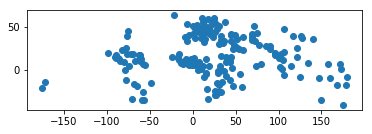

In [80]:
xx = cities.plot()

for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

# Creating interactive maps

In [218]:
import geopandas
cont1 = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cont1.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [219]:
# Transform POLYGON to POINT
# copy poly to new GeoDataFrame
points = cont1.copy()
# change the geometry
points.geometry = points['geometry'].centroid
# same crs
#points.crs = poly.crs
points.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,POINT (66.08669022192834 33.85639928169076)
1,12799293.0,Africa,Angola,AGO,110300.0,POINT (17.47057255231345 -12.24586903613316)
2,3639453.0,Europe,Albania,ALB,21810.0,POINT (20.03242643144321 41.14135330604877)
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,POINT (54.20671476159633 23.86863365334761)
4,40913584.0,South America,Argentina,ARG,573900.0,POINT (-65.17536077114174 -35.44682148949509)


In [220]:
# Filter for South America - All counties from filter continent
cont_sa = cont1[cont1.continent == 'South America']
cont_sa

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...
21,9775246.0,South America,Bolivia,BOL,43270.0,POLYGON ((-62.84646847192156 -22.0349854468694...
22,198739269.0,South America,Brazil,BRA,1993000.0,POLYGON ((-57.62513342958296 -30.2162948544542...
29,16601707.0,South America,Chile,CHL,244500.0,(POLYGON ((-68.63401022758316 -52.636370458874...
35,45644023.0,South America,Colombia,COL,395400.0,POLYGON ((-75.37322323271385 -0.15203175212045...
46,14573101.0,South America,Ecuador,ECU,107700.0,POLYGON ((-80.30256059438722 -3.40485645916471...
54,3140.0,South America,Falkland Is.,FLK,105.1,"POLYGON ((-61.2 -51.85, -60 -51.25, -59.15 -51..."
67,772298.0,South America,Guyana,GUY,2966.0,POLYGON ((-59.75828487815919 8.367034816924047...
124,29546963.0,South America,Peru,PER,247300.0,POLYGON ((-69.59042375352405 -17.5800118954193...
131,6995655.0,South America,Paraguay,PRY,28890.0,POLYGON ((-62.68505713565789 -22.2490292294223...


In [296]:
# Filter for South America
cont = points[points.continent == 'South America']
contx = cont[['name', 'geometry']]
contx.head()
#contx.type

,name,geometry
4,Argentina,POINT (-65.17536077114174 -35.44682148949509)
21,Bolivia,POINT (-64.64140560603109 -16.72898701530583)
22,Brazil,POINT (-53.0543400357671 -10.80677364349892)
29,Chile,POINT (-71.52064394516432 -39.04701430994845)
35,Colombia,POINT (-73.07773208697481 3.927213862709704)


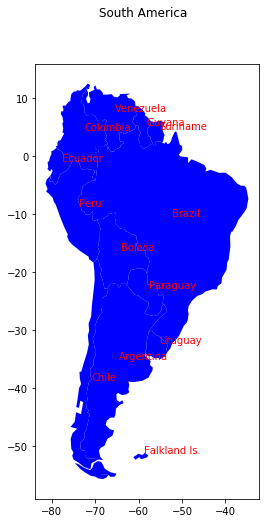

In [226]:
f, ax = plt.subplots(1, figsize=(4,8))
ax.set_axis_on()
f.suptitle('South America')

ax = cont_sa.plot(ax=ax, facecolor='blue', alpha=1, linewidth=0)

 
for x, y, label in zip(contx.geometry.x, contx.geometry.y, contx.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='red')
#    plt.show()


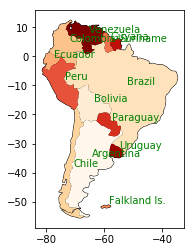

In [233]:
# Plot Base continent and capitals
base = cont_sa.plot(color='grey', edgecolor='black', cmap='OrRd')
# Plot Base continent - Cities
ax = cont_sa.plot(ax=base, facecolor='blue', alpha=1, linewidth=0,  cmap='OrRd')
f.suptitle('South America')
# Plot Base continent - Cities
for x, y, label in zip(contx.geometry.x, contx.geometry.y, contx.name):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",color='green')

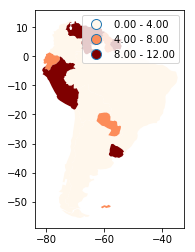

In [235]:
ax = cont_sa.plot( column='name', scheme='QUANTILES', k=3, cmap='OrRd', legend=True)

# Obtain cities from a country - Geo spacial intersection

In [169]:
# cities
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))
cities.head()

,name,geometry
0,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,San Marino,POINT (12.44177015780014 43.936095834768)
2,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,Palikir,POINT (158.1499743237623 6.916643696007725)


In [170]:
cont = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cont.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [171]:
# filter countries from Europe
country = cont[(cont['continent'] == 'Europe')]
country.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
9,8210281.0,Europe,Austria,AUT,329500.0,"POLYGON ((16.97966678230404 48.12349701597631,..."
12,10414336.0,Europe,Belgium,BEL,389300.0,"POLYGON ((3.314971144228537 51.34578095153609,..."
16,7204687.0,Europe,Bulgaria,BGR,93750.0,"POLYGON ((22.65714969248299 44.23492300066128,..."
18,4613414.0,Europe,Bosnia and Herz.,BIH,29700.0,"POLYGON ((19.00548628101012 44.86023366960916,..."


In [172]:
# Filter to country Italy
country_xx = cont[(cont['iso_a3'] == 'ITA')]
country_xx

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
79,58126212.0,Europe,Italy,ITA,1823000.0,(POLYGON ((15.52037601081383 38.23115509699147...


In [173]:
country_xx = country_br[['geometry', 'name']]
country_xx

,geometry,name
index_right,,
79,(POLYGON ((15.52037601081383 38.23115509699147...,Italy


In [196]:
# Transform POLYGON to POINT
# 
points = country_xx.copy()
# change the geometry
points.geometry = points['geometry'].centroid
points.head()

,geometry,name
index_right,,
79,POINT (12.1407883722359 42.75118305296424),Italy


In [195]:
br_x=points.geometry.x
br_y=points.geometry.y
print ('Coordenadas do país : ', br_x, br_y)

Coordenadas do país :  index_right
79    12.140788
dtype: float64 index_right
79    42.751183
dtype: float64


In [176]:
xcountries = country_xx.to_crs('+init=epsg:3395')

xcities = cities.to_crs('+init=epsg:3395')

In [177]:
xcountries

,geometry,name
index_right,,
79,(POLYGON ((1727720.354443935 4585686.481436529...,Italy


In [178]:
xcities.head()

,name,geometry
0,Vatican City,POINT (1386304.648838061 5117957.424166164)
1,San Marino,POINT (1385011.518533259 5425900.2767389)
2,Vaduz,POINT (1059390.799771928 5932596.001064743)
3,Luxembourg,POINT (682388.790950537 6346728.171340298)
4,Palikir,POINT (17605174.61069051 766692.1365341047)


In [179]:
# Execute spatial join Country with cities to obtain the Cities from Country
cities_with_country = geopandas.sjoin(cities, country_br, how="inner", op='intersects')

cities_with_country.head()

,name_left,geometry,index_right,name_right
0,Vatican City,POINT (12.45338654497177 41.90328217996012),79,Italy
1,San Marino,POINT (12.44177015780014 43.936095834768),79,Italy
192,Rome,POINT (12.481312562874 41.89790148509894),79,Italy


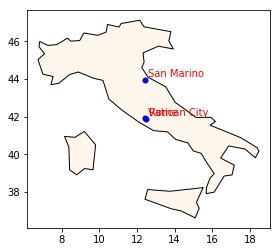

In [236]:
# PLOT Geopandas result

ax.set_axis_on()
f.suptitle(xcountries.name.values)

base = country_xx.plot(color='grey', edgecolor='black', cmap='OrRd')
ax = cities_with_country.plot(ax=base, facecolor='blue', alpha=1, linewidth=0)
 
for x, y, label in zip(cities_with_country.geometry.x, cities_with_country.geometry.y, cities_with_country.name_left):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='red')
 

# Mapping Tools

In [197]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [199]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


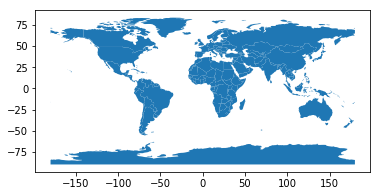

In [198]:
# Plot the world
world.plot()

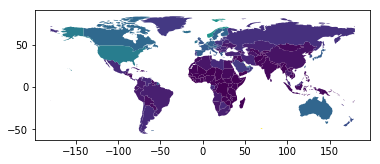

In [200]:
# Plot by GDP per capta
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap');

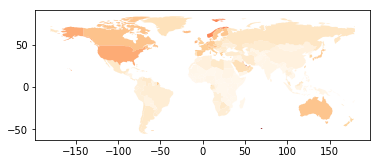

In [201]:
# Using colors
world.plot(column='gdp_per_cap', cmap='OrRd');

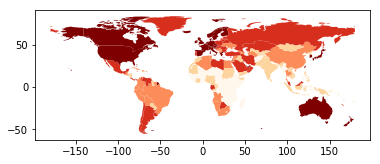

In [202]:
# color maps scaled can also be manipulated with the scheme
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

# Maps with Layers
### There are two strategies for making a map with multiple layers – one more succinct, and one that is a little more flexible.

### Before combining maps, however, remember to always ensure they share a common CRS (so they will align).

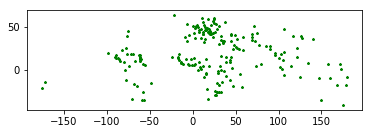

In [203]:
# Look at capitals
# Note use of standard `pyplot` line style options
cities.plot(marker='*', color='green', markersize=5);

# Check crs
cities = cities.to_crs(world.crs)

# Now we can overlay over country outlines
# And yes, there are lots of island capitals
# apparently in the middle of the ocean!

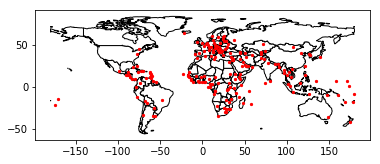

In [237]:
base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5);

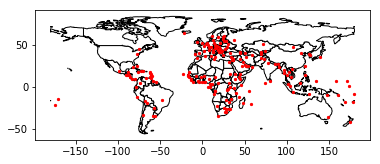

In [241]:
# Same PLOT using subplots
fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.

ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')

cities.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show();

# Another Example - Plot Basil Map with cities labels
### reading City Points from a File XLS

In [252]:
c_br = pd.read_excel('ml/GeoPandas/cities_of_brazil.xls')

In [258]:
# delete column
del c_br['SNo']

In [349]:
c_br.head()

,City,State,Latitude,Longitude,Coordinates
0,Aracaju,Sergipe,-10.55,-37.03,POINT (-37.03 -10.55)
1,Araraquara,Sao Paulo,-21.48,-48.11,POINT (-48.11 -21.48)
2,Assis,Sao Paulo,-22.40,-50.25,POINT (-50.25 -22.4)
3,Bauru,Sao Paulo,-22.19,-49.04,POINT (-49.04 -22.19)
4,Belém,Para,-1.27,-48.30,POINT (-48.3 -1.27)


In [260]:
# Transform Latitude and Longitude to a POINT
# A GeoDataFrame needs a shapely object, so we create a new column Coordinates as a tuple of Longitude and Latitude :
c_br['Coordinates'] = list(zip(c_br.Longitude, c_br.Latitude))

In [350]:
c_br.head()

,City,State,Latitude,Longitude,Coordinates
0,Aracaju,Sergipe,-10.55,-37.03,POINT (-37.03 -10.55)
1,Araraquara,Sao Paulo,-21.48,-48.11,POINT (-48.11 -21.48)
2,Assis,Sao Paulo,-22.40,-50.25,POINT (-50.25 -22.4)
3,Bauru,Sao Paulo,-22.19,-49.04,POINT (-49.04 -22.19)
4,Belém,Para,-1.27,-48.30,POINT (-48.3 -1.27)


In [319]:
# transform tuples to Point :
c_br['Coordinates'] = c_br['Coordinates'].apply(Point)
# Transform to geo spacial table
c_br = geopandas.GeoDataFrame(c_br, geometry='Coordinates')
c_br.head()

,City,State,Latitude,Longitude,Coordinates
0,Aracaju,Sergipe,-10.55,-37.03,POINT (-37.03 -10.55)
1,Araraquara,Sao Paulo,-21.48,-48.11,POINT (-48.11 -21.48)
2,Assis,Sao Paulo,-22.40,-50.25,POINT (-50.25 -22.4)
3,Bauru,Sao Paulo,-22.19,-49.04,POINT (-49.04 -22.19)
4,Belém,Para,-1.27,-48.30,POINT (-48.3 -1.27)


In [320]:
# plot the coordinates over a country-level map.
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [321]:
# We restrict to South America - Brazil.
#gdf = world[world.continent == 'South America']
gdf = world[world.name == 'Brazil']
gdf

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
22,198739269.0,South America,Brazil,BRA,1993000.0,POLYGON ((-57.62513342958296 -30.2162948544542...


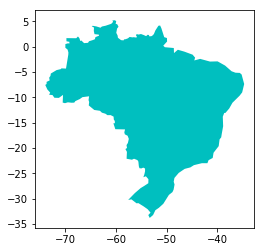

In [322]:
water = 'lightskyblue'
earth = 'tan'
#gdf.set_facecolor(water)

# We can now plot our GeoDataFrame.
gdf.plot( color='cy', facecolor=earth, linewidth=1, alpha=1)
# Plot only row 22 - BRAZIL
#gdf.loc[22, 'geometry']

In [323]:
# Create a subset with partial columns
cities_with_country = c_br[['City','Coordinates']]
cities_with_country.head()

,City,Coordinates
0,Aracaju,POINT (-37.03 -10.55)
1,Araraquara,POINT (-48.11 -21.48)
2,Assis,POINT (-50.25 -22.4)
3,Bauru,POINT (-49.04 -22.19)
4,Belém,POINT (-48.3 -1.27)


In [324]:
# Rename columns
new_df = cities_with_country.rename(columns={'Coordinates':'geometry'})
new_df.head()

,City,geometry
0,Aracaju,POINT (-37.03 -10.55)
1,Araraquara,POINT (-48.11 -21.48)
2,Assis,POINT (-50.25 -22.4)
3,Bauru,POINT (-49.04 -22.19)
4,Belém,POINT (-48.3 -1.27)


In [348]:
new_df.type.head()

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

In [335]:
# Transform DataFrame with geometry capabilities
cities_with_country = geopandas.GeoDataFrame(new_df, geometry='geometry')
cities_with_country.head()

,City,geometry
0,Aracaju,POINT (-37.03 -10.55)
1,Araraquara,POINT (-48.11 -21.48)
2,Assis,POINT (-50.25 -22.4)
3,Bauru,POINT (-49.04 -22.19)
4,Belém,POINT (-48.3 -1.27)


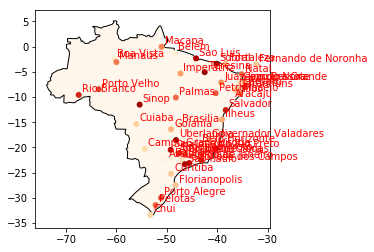

In [338]:
# PLOT Geopandas result
xx.set_axis_on()

base = gdf.plot(color='grey', edgecolor='black', cmap='OrRd')
ax = cities_with_country.plot(ax=base,  alpha=1, linewidth=0, cmap='OrRd')
 
for x, y, label in zip(cities_with_country.geometry.x, cities_with_country.geometry.y, cities_with_country.City):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points", color='red')

 

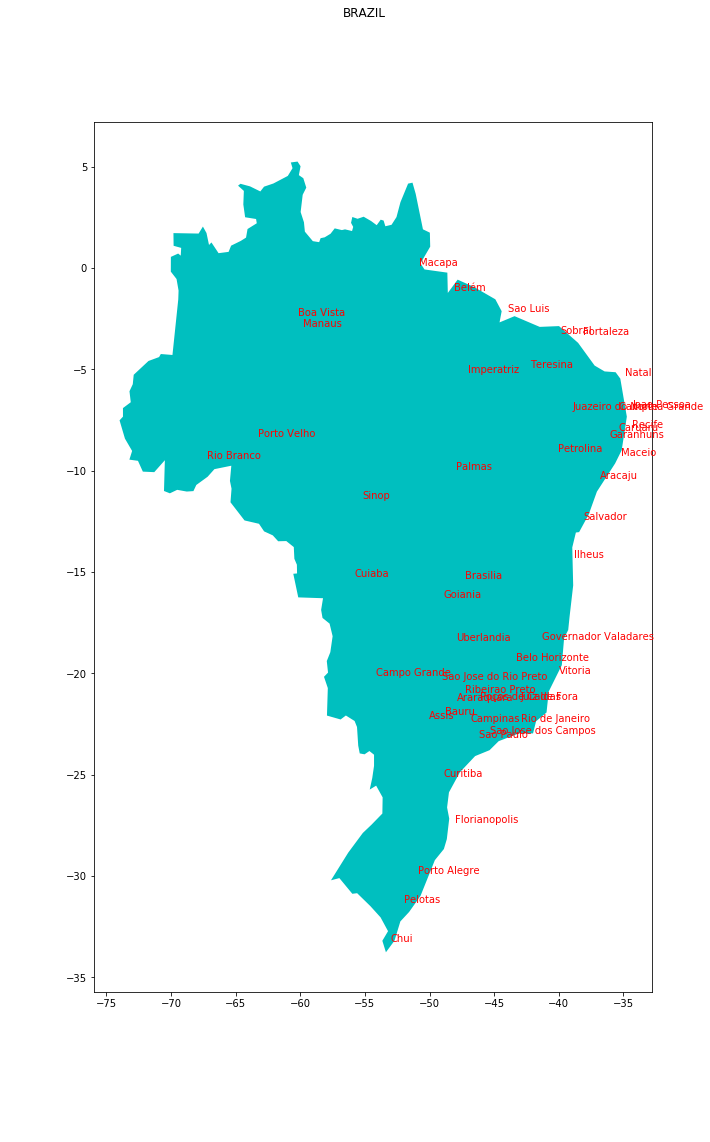

In [353]:
# PLOT Geopandas with labels
f, ax = plt.subplots(1, figsize=(10,16))
ax.set_axis_on()
f.suptitle('BRAZIL')
# Plot the Map
ax = gdf.plot(ax=ax, facecolor='cy', alpha=1, linewidth=1)
# Write labels
for x, y, label in zip(cities_with_country.geometry.x, cities_with_country.geometry.y, cities_with_country.City):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), alpha=3, textcoords="offset points",color='red')